In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

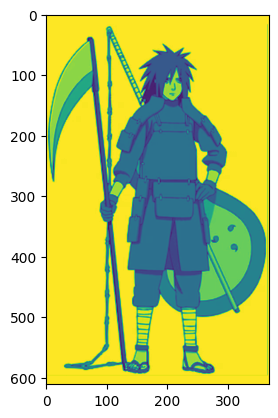

In [11]:
img = cv2.imread("test.png", 0) # here 0 means greyscale 1 means rgb channel,
plt.imshow(img)
plt.show()

In [12]:
import numpy as np

def resize_with_exact_patch_constraints(a, b, num_col_patches=80, patch_size=20, max_width=6000, max_height=6000):
    """
    Resizes the image ensuring:
    1. The number of column patches is exactly `num_col_patches`
    2. The width and height are exactly divisible by `patch_size`
    3. Aspect ratio is maintained as closely as possible
    """
    aspect_ratio = a / b  # Maintain aspect ratio

    # **Set the new width based on number of patches**
    b_s = num_col_patches * patch_size  # Width = 300 patches * 6 pixels per patch

    # **Compute the corresponding height while maintaining aspect ratio**
    a_s = round(aspect_ratio * b_s)

    # **Round height to the nearest multiple of patch_size to ensure divisibility**
    a_s = round(a_s / patch_size) * patch_size

    # **Ensure the resized height is within limits**
    if a_s > max_height:
        a_s = max_height  # Limit height
        b_s = round(a_s / aspect_ratio / patch_size) * patch_size  # Adjust width accordingly

    return int(a_s), int(b_s), patch_size

# Example usage
original_b = img.shape[0]  # Original height (rows)
original_a = img.shape[1]  # Original width (columns)

resized_b, resized_a, patch_size = resize_with_exact_patch_constraints(original_b, original_a )

print(f"Resized Dimensions: {resized_a}x{resized_b}")
print(f"Patch Size: {patch_size}")



Resized Dimensions: 1600x2660
Patch Size: 20


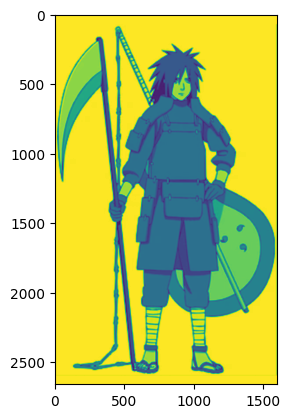

(2660, 1600)


In [13]:
resized_image = cv2.resize(img, (resized_a, resized_b))

plt.imshow(resized_image)
plt.show()
print(resized_image.shape)

In [14]:
import pandas as pd

# URL to the CSV file
url = 'ascii_characters_roman.csv'

# Read CSV file from URL into pandas DataFrame
df = pd.read_csv(url)

# Display the DataFrame
print(df.head)

# Creating an empty list
res=[]

# Iterating through the columns of 
# dataframe
for column in df.columns:
    
    # Storing the rows of a column 
    # into a temporary list
    li = df[column].tolist()
    
    # appending the temporary list
    res.append(li)
    
# Printing the final list
print(res)





<bound method NDFrame.head of      char                                        pca_3  \
0      32  [-244.92411747  -84.62639828  -35.6003125 ]   
1      33  [  28.78533061 -359.51116664  271.59706257]   
2      34  [ -47.30696216 -127.78130166   38.95888657]   
3      35  [ 527.91513658   -3.2242372  -341.39161275]   
4      36  [ 427.15912364 -300.68180541   37.77935685]   
..    ...                                          ...   
251   318  [-240.93115227   54.48927741   -7.68074332]   
252   319  [-240.93115227   54.48927741   -7.68074332]   
253   320  [-240.93115227   54.48927741   -7.68074332]   
254   321  [-240.93115227   54.48927741   -7.68074332]   
255   322  [-240.93115227   54.48927741   -7.68074332]   

                                                 pca_5  \
0    [-244.92411747  -84.62639828  -35.6003125   -6...   
1    [  28.78533061 -359.51116664  271.59706257  -2...   
2    [ -47.30696216 -127.78130166   38.95888657 -28...   
3    [ 527.91513658   -3.2242372  -341.39

In [15]:
# Iterate through the relevant slice of res and convert string to numpy array
for i in range(1, 4):  # Loop over res[1] and res[2]
    for j in range(len(res[i])):  # Loop over elements in res[i]
        # Convert the string to numpy array and store back
        res[i][j] = np.fromstring(res[i][j].strip('[]'), sep=' ')

In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt

import sys



def flatten(img):
    #arr = [img.shape[0]*img.shape[1]]
    arr = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            arr.append(img[i, j])
    return arr



def process_patch(patch, pca_size):
    """
    Example function to process a given image patch.
    This function can be replaced with any custom processing logic.
    """
    arr = flatten(patch)
    return arr

    """
    scaler.fit(arr)

    # Normalize features using the fitted scaler
    arr_scaled = scaler.transform(arr)

    # Dimensionality reduction (optional)
    n_components = pca_size
    pca = PCA(n_components=n_components)
    pca_arr = pca.fit_transform(arr_scaled)


    min_dist = sys.maxint
    min_dist_char = 0

    if(pca_size == 3):
        for i in range(res.shape[0]):
            dist = np.linalg.norm(pca_arr - res[1][i])
            if(dist < min_dist):
                min_dist = dist
                min_dist_char = res[0][i]
    
    elif(pca_size == 5):
        for i in range(res.shape[0]):
            dist = np.linalg.norm(pca_arr - res[2][i])
            if(dist < min_dist):
                min_dist = dist
                min_dist_char = res[0][i]

    elif(pca_size == 7):
        for i in range(res.shape[0]):
            dist = np.linalg.norm(pca_arr - res[3][i])
            if(dist < min_dist):
                min_dist = dist
                min_dist_char = res[0][i]

    
    return chr(min_dist_char)

    
    """








def extract_patches(image, k):
    """
    Extract k x k patches from the given image and pass each patch 
    to the processing function.
    
    Parameters:
    - image (2D numpy array): The input matrix representing the image.
    - k (int): The patch size (k x k).
    
    Returns:
    - A 2D list (matrix) of processed patch results.
    """
    a, b = resized_image.shape  # Get the image dimensions

    # Ensure the image dimensions are divisible by k
    if a % k != 0 or b % k != 0:
        raise ValueError(f"Image dimensions ({a}x{b}) must be divisible by patch size {k}.")
    
    # Corrected initialization
    #processedImage = [[0 for _ in range(b // k)] for _ in range(a // k)]
    processedImage = []
    
    # Iterate through the image in steps of k
    for i in range(0, a, k):
        for j in range(0, b, k):
            patch = image[i:i+k, j:j+k]  # Extract k x k patch
            result = process_patch(patch,3)  # Process the patch
            processedImage.append(result)  # Correct indexing


    return processedImage, a//k,b//k

    """
    # Corrected initialization
    processedImage2 = [[0 for _ in range(b // k)] for _ in range(a // k)]
    
    # Iterate through the image in steps of k
    for i in range(0, a, k):
        for j in range(0, b, k):
            patch = image[i:i+k, j:j+k]  # Extract k x k patch
            result = process_patch(patch,5)  # Process the patch
            processedImage2[i // k][j // k] = result  # Correct indexing
    
    
    # Corrected initialization
    processedImage3 = [[0 for _ in range(b // k)] for _ in range(a // k)]
    
    # Iterate through the image in steps of k
    for i in range(0, a, k):
        for j in range(0, b, k):
            patch = image[i:i+k, j:j+k]  # Extract k x k patch
            result = process_patch(patch,7)  # Process the patch
            processedImage3[i // k][j // k] = result  # Correct indexing

    return np.array(processedImage), np.array(processedImage2), np.array(processedImage3)
    """



processedImageArr, a, b = extract_patches(resized_image, patch_size)

# Visualize the processed image
#plt.imshow(processedImage, cmap='gray')
#plt.show()

print(len(processedImageArr))
print (len(processedImageArr[0]))


10640
400


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import sys

# Fit the scaler on all collected features
scaler = StandardScaler()


k = patch_size

def calculate(realArr, pca_size):
    """
    Example function to process a given image patch.
    This function can be replaced with any custom processing logic.
    """

    scaler.fit(realArr)

    # Normalize features using the fitted scaler
    #arr_scaled = scaler.transform(realArr)

    # Dimensionality reduction (optional)
    n_components = pca_size
    pca = PCA(n_components=n_components)
    pca_arr = pca.fit_transform(realArr)


    main_arr = []

    def reshape_1d_to_2d(a, rows, cols):
        if len(a) != rows * cols:
            raise ValueError("The size of the 1D array must be equal to rows * cols.")
    
        b = np.array(a).reshape(rows, cols)
        return b


    for k in range(0,len(realArr)):

        min_dist = sys.maxsize
        min_dist_char = 0

        if(pca_size == 3):
            for i in range(len(res[0])):
                #dist = np.linalg.norm(pca_arr[k] - res[1][i])          #l2 norm
                dist = np.linalg.norm(pca_arr[k] - res[1][i], ord=1)    #l1 norm  
                if(dist < min_dist):
                    min_dist = dist
                    min_dist_char = res[0][i]
    
        elif(pca_size == 5):
            for i in range(len(res[0])):
                #dist = np.linalg.norm(pca_arr[k] - res[2][i])          #l2 norm
                dist = np.linalg.norm(pca_arr[k] - res[2][i], ord=1)    #l2 norm

                if(dist < min_dist):
                    min_dist = dist
                    min_dist_char = res[0][i]

        elif(pca_size == 7):
            for i in range(len(res[0])):
                #dist = np.linalg.norm(pca_arr[k] - res[3][i])          #l2 norm
                dist = np.linalg.norm(pca_arr[k] - res[3][i], ord=1)    #l1 norm

                if(dist < min_dist):
                    min_dist = dist
                    min_dist_char = res[0][i]

        main_arr.append(chr(min_dist_char))

    processedImage = [[0 for _ in range(b // k)] for _ in range(a // k)]

    processedImage = reshape_1d_to_2d(main_arr, a, b)


    
    return processedImage




chr_arr =  calculate(processedImageArr,3)

chr_arr2 =  calculate(processedImageArr,5)

chr_arr3 =  calculate(processedImageArr,7)

    


In [19]:
print(len(chr_arr[0]))

80


In [20]:
# Convert 2D Array to String
array_string = '\n'.join([''.join(map(str, row)) for row in chr_arr])


# Write to Text File
filename1 = "outputROMANpca7.txt"
with open(filename1, 'w') as file:
    file.write(array_string)


# Convert 2D Array to String
array_string = '\n'.join([''.join(map(str, row)) for row in chr_arr2])


# Write to Text File
filename2 = "outputROMANpca5.txt"
with open(filename2, 'w') as file:
    file.write(array_string)

# Convert 2D Array to String
array_string = '\n'.join([''.join(map(str, row)) for row in chr_arr3])



# Write to Text File
filename3 = "outputROMANpca7.txt"
with open(filename3, 'w') as file:
    file.write(array_string)


In [24]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont



# **Use a Proper Monospace Font**
font_size = 26  # Adjust font size to match aspect ratio
font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf"  # Linux
# font_path = "C:/Windows/Fonts/consola.ttf"  # Windows Example

try:
    font = ImageFont.truetype(font_path, font_size)
except IOError:
    font = ImageFont.load_default()  # Fallback to a default font

# **Fix Aspect Ratio Properly**
char_width, char_height = font.getsize("A")  # Get width & height of a single character
aspect_ratio = char_height / char_width  # Aspect ratio of the font
scale_factor = 1.8  # 🔧 **Manually correct scaling to fix squishing**

# **Calculate Image Size Correctly**
cols = len(chr_arr[0])  # Number of columns (characters per row)
rows = len(chr_arr)  # Number of rows

# **Apply Corrected Scaling**
padding_x = 460  # 🔧 Extra space for left/right padding
padding_y = 40  # 🔧 Extra space for top/bottom padding
image_width = int(cols * char_width * scale_factor) + padding_x  # 🔧 Fix width scaling
image_height = int(rows * char_height * 1.3) + padding_y  # 🔧 Fix height scaling

# **Create a Blank White Image**
image = Image.new("RGB", (image_width, image_height), "white")
draw = ImageDraw.Draw(image)

# **Draw ASCII Text with Perfect Spacing**
x_start = padding_x // 2  # 🔧 Center horizontally
y_start = padding_y // 2  # 🔧 Center vertically

y = y_start
for row in chr_arr:
    text = ' '.join(row)  # Add space between characters
    draw.text((x_start, y), text, font=font, fill="black")
    y += int(char_height * 1.2)  # 🔧 Increased line spacing

# **Save Corrected Image**
image_filename = "outputROMANpca3.png"
image.save(image_filename)

print(f" Perfected ASCII image saved as {image_filename}")


 Perfected ASCII image saved as outputROMANpca3.png


In [25]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont



# **Use a Proper Monospace Font**
font_size = 26  # Adjust font size to match aspect ratio
font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf"  # Linux
# font_path = "C:/Windows/Fonts/consola.ttf"  # Windows Example

try:
    font = ImageFont.truetype(font_path, font_size)
except IOError:
    font = ImageFont.load_default()  # Fallback to a default font

# **Fix Aspect Ratio Properly**
char_width, char_height = font.getsize("A")  # Get width & height of a single character
aspect_ratio = char_height / char_width  # Aspect ratio of the font
scale_factor = 1.8  # 🔧 **Manually correct scaling to fix squishing**

# **Calculate Image Size Correctly**
cols = len(chr_arr2[0])  # Number of columns (characters per row)
rows = len(chr_arr2)  # Number of rows

# **Apply Corrected Scaling**
padding_x = 460  # 🔧 Extra space for left/right padding
padding_y = 40  # 🔧 Extra space for top/bottom padding
image_width = int(cols * char_width * scale_factor) + padding_x  # 🔧 Fix width scaling
image_height = int(rows * char_height * 1.3) + padding_y  # 🔧 Fix height scaling

# **Create a Blank White Image**
image = Image.new("RGB", (image_width, image_height), "white")
draw = ImageDraw.Draw(image)

# **Draw ASCII Text with Perfect Spacing**
x_start = padding_x // 2  # 🔧 Center horizontally
y_start = padding_y // 2  # 🔧 Center vertically

y = y_start
for row in chr_arr2:
    text = ' '.join(row)  # Add space between characters
    draw.text((x_start, y), text, font=font, fill="black")
    y += int(char_height * 1.2)  # 🔧 Increased line spacing

# **Save Corrected Image**
image_filename = "outputROMANpca5.png"
image.save(image_filename)

print(f" Perfected ASCII image saved as {image_filename}")


 Perfected ASCII image saved as outputROMANpca5.png


In [26]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont



# **Use a Proper Monospace Font**
font_size = 26  # Adjust font size to match aspect ratio
font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf"  # Linux
# font_path = "C:/Windows/Fonts/consola.ttf"  # Windows Example

try:
    font = ImageFont.truetype(font_path, font_size)
except IOError:
    font = ImageFont.load_default()  # Fallback to a default font

# **Fix Aspect Ratio Properly**
char_width, char_height = font.getsize("A")  # Get width & height of a single character
aspect_ratio = char_height / char_width  # Aspect ratio of the font
scale_factor = 1.8  # 🔧 **Manually correct scaling to fix squishing**

# **Calculate Image Size Correctly**
cols = len(chr_arr3[0])  # Number of columns (characters per row)
rows = len(chr_arr3)  # Number of rows

# **Apply Corrected Scaling**
padding_x = 460  # 🔧 Extra space for left/right padding
padding_y = 40  # 🔧 Extra space for top/bottom padding
image_width = int(cols * char_width * scale_factor) + padding_x  # 🔧 Fix width scaling
image_height = int(rows * char_height * 1.3) + padding_y  # 🔧 Fix height scaling

# **Create a Blank White Image**
image = Image.new("RGB", (image_width, image_height), "white")
draw = ImageDraw.Draw(image)

# **Draw ASCII Text with Perfect Spacing**
x_start = padding_x // 2  # 🔧 Center horizontally
y_start = padding_y // 2  # 🔧 Center vertically

y = y_start
for row in chr_arr3:
    text = ' '.join(row)  # Add space between characters
    draw.text((x_start, y), text, font=font, fill="black")
    y += int(char_height * 1.2)  # 🔧 Increased line spacing

# **Save Corrected Image**
image_filename = "outputROMANpca7.png"
image.save(image_filename)

print(f" Perfected ASCII image saved as {image_filename}")


 Perfected ASCII image saved as outputROMANpca7.png
